In [27]:
import os
import pandas as pd
import numpy as np
from src.signals.ppg import PPGSubject
from src.signals.eeg import EEGSubject
from src.signals.subject import Subject
from src.signals.eda import EDAExperiment
from src.signals.ppg import PPGExperiment
from src.experiments.experiment import ExperimentType
from math import sqrt, log10
from src.classifiers.tuning.hptuning import Tuner, get_hyperparameters, best_trial_hyperparameter
# from src.classifiers.hyperparameters import Hyperparameters
# from src.signals.eda import 
import scipy.stats as stats
from sklearn import svm


path = os.getcwd()
survey_path = "{0}/survey_gamification".format(os.getcwd())

In [8]:
ppg = PPGSubject(path=survey_path, id="11", device="samsung", sensor="ppg", experiment_type=ExperimentType.FEATURE_ENGINEERING)
emp = PPGSubject(path=survey_path, id="11", device="empatica", sensor="ppg", experiment_type=ExperimentType.)
# eda = Subject(path=survey_path, id="11", device="empatica", sensor="eda")
# eeg =  EEGSubject(path=survey_path, id="11", device="", sensor="")

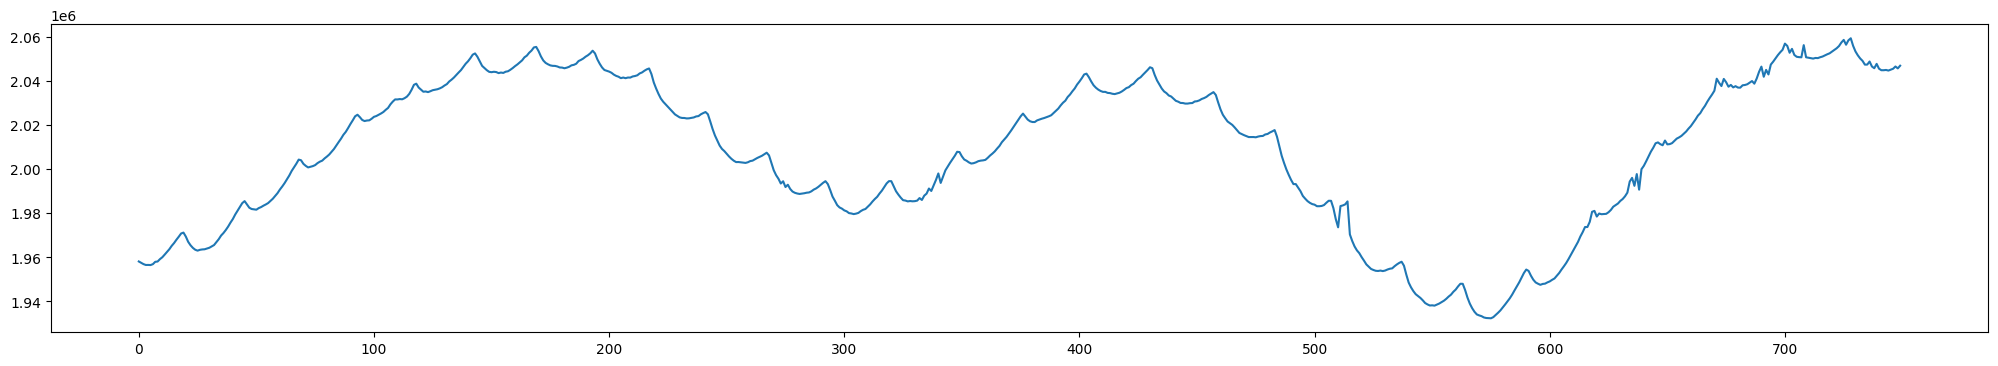

In [9]:
ppg.show(5)

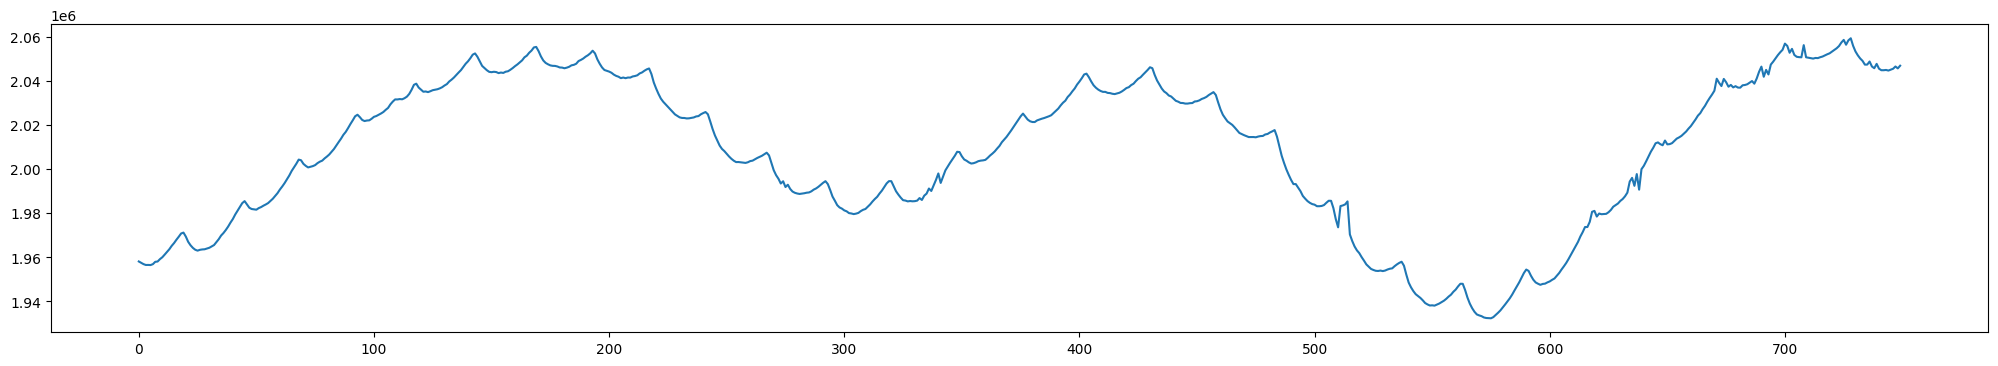

In [3]:
ppg.show(5)

In [26]:
fee = PPGExperiment(classifier='cnn', type=ExperimentType.FEATURE_ENGINEERING, path=path, device='samsung')
emp = PPGExperiment(classifier='cnn', type=ExperimentType.FEATURE_ENGINEERING, path=path, device='empatica')


In [36]:
def test_values(experiment):
  x_test = np.concatenate([s.x() for s in experiment.test_subjects])
  y_test = np.concatenate([s.y() for s in experiment.test_subjects])

  x_test = np.reshape(x_test, (1, -1, 10))[0]
  y_test = np.reshape(y_test, (1, -1))[0]
  return x_test, y_test

In [30]:
sms_preds = {}
emp_preds = {}

In [32]:
def cv_train(experiment, x_test, y_test, preds_dict):
  X = []
  y = []
  for s in experiment.splits:
    clf = svm.SVC()
    X = np.concatenate([s.x_train(), s.x_val()])
    y = np.concatenate([s.y_train(), s.y_val()])

    X = np.reshape(X, (1, -1, 10))[0]
    y = np.reshape(y, (1, -1))[0]

    clf.fit(X, y)
    y_pred = clf.predict(x_test)
    preds_dict[s.id] = {
      'y_pred': y_pred,
      'y_true': y_test
    }


In [33]:
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [34]:
def show_results(y_preds):
  for x in y_preds:
    print(f'Subject {x}')
    y_true = y_preds[x]['y_true']
    y_pred = y_preds[x]['y_pred']
    print(classification_report(y_pred,y_true))

    plt.figure(figsize=(16, 8))
    plt.plot(y_true, 'b-', y_pred, 'r.')
    plt.show()

In [37]:
smsx, smsy = test_values(fee)
empx, empy = test_values(emp)

In [41]:
cv_train(fee, smsx, smsy, sms_preds)
cv_train(emp, empx, empy, emp_preds)

Subject 11
              precision    recall  f1-score   support

           0       0.49      0.74      0.59       953
           1       0.88      0.71      0.79      2557

    accuracy                           0.72      3510
   macro avg       0.69      0.73      0.69      3510
weighted avg       0.78      0.72      0.74      3510



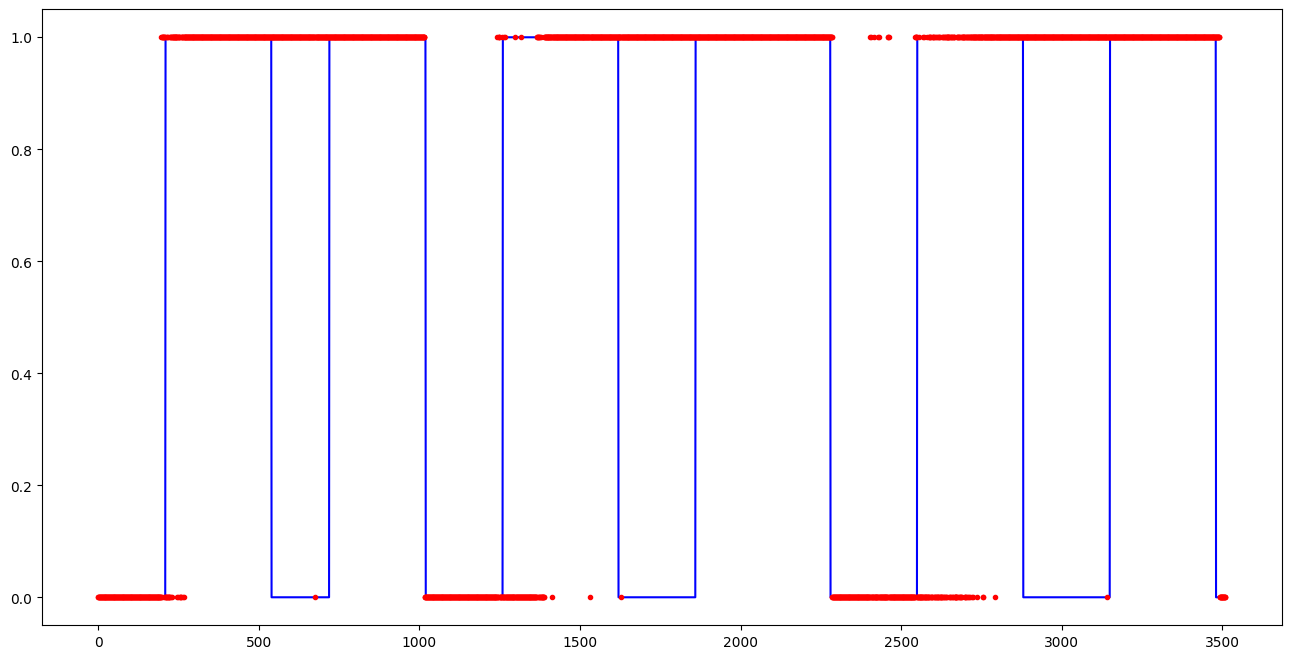

Subject 12
              precision    recall  f1-score   support

           0       0.57      0.74      0.64      1120
           1       0.86      0.74      0.80      2390

    accuracy                           0.74      3510
   macro avg       0.72      0.74      0.72      3510
weighted avg       0.77      0.74      0.75      3510



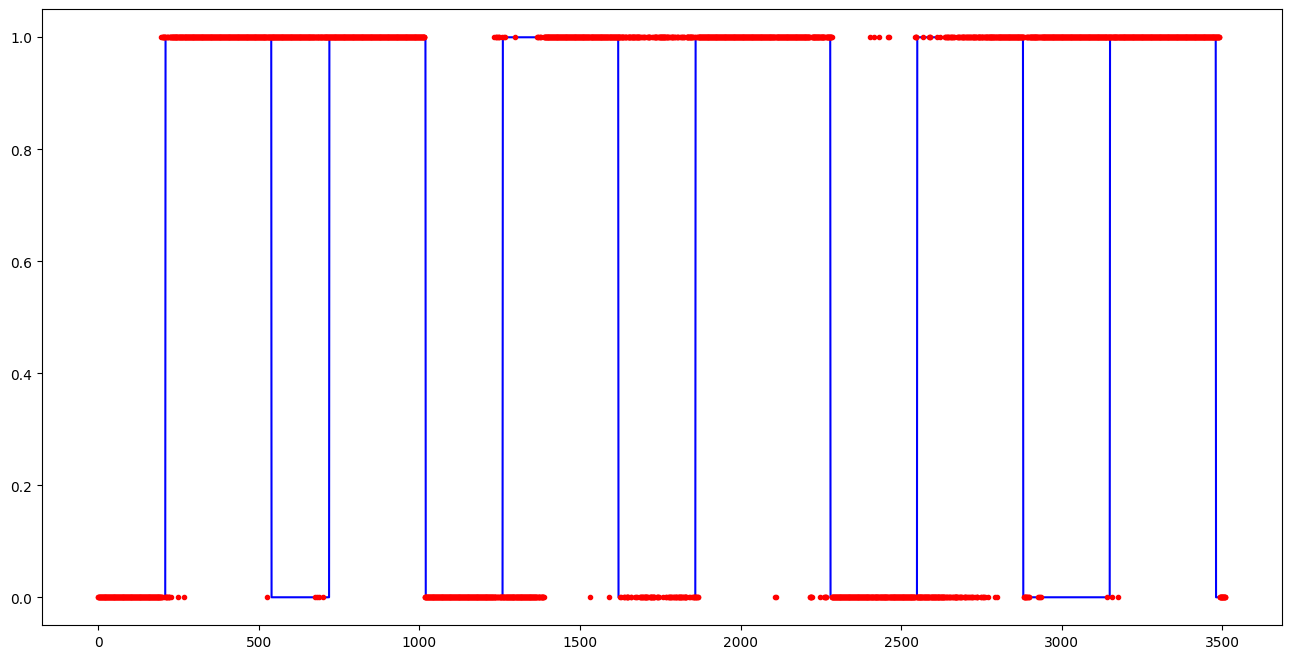

Subject 13
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      1091
           1       0.91      0.78      0.84      2419

    accuracy                           0.79      3510
   macro avg       0.76      0.80      0.77      3510
weighted avg       0.82      0.79      0.80      3510



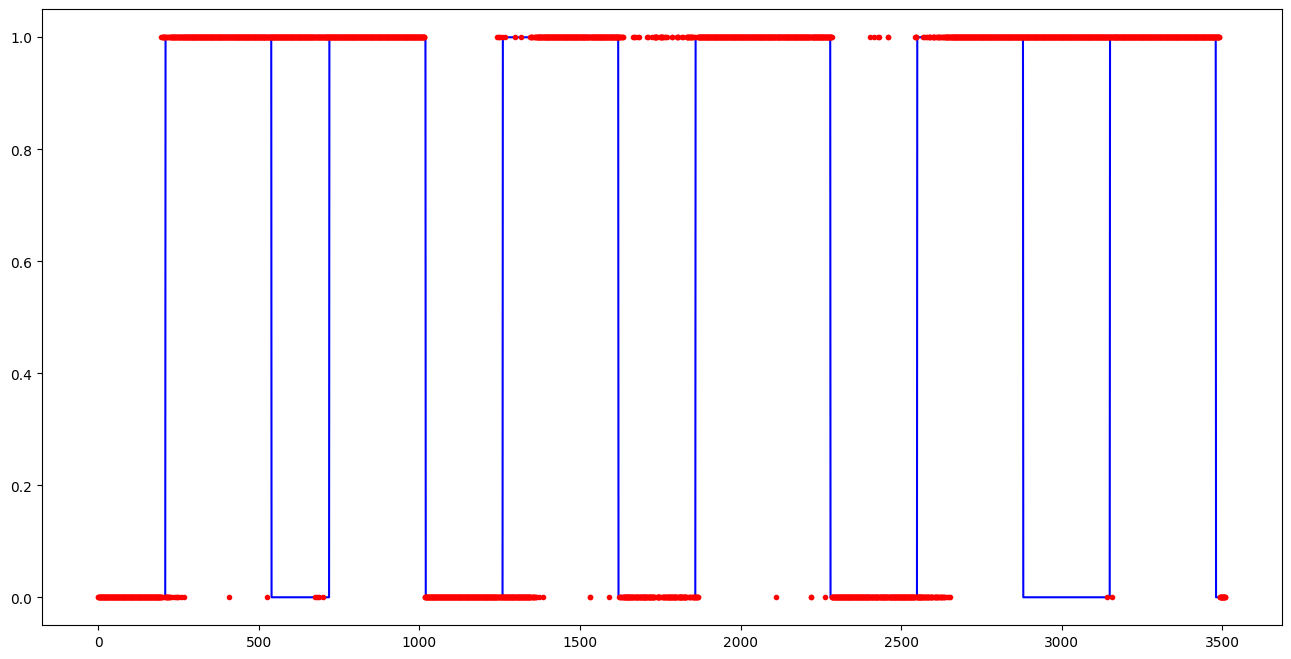

Subject 14
              precision    recall  f1-score   support

           0       0.52      0.76      0.62       985
           1       0.88      0.73      0.80      2525

    accuracy                           0.73      3510
   macro avg       0.70      0.74      0.71      3510
weighted avg       0.78      0.73      0.75      3510



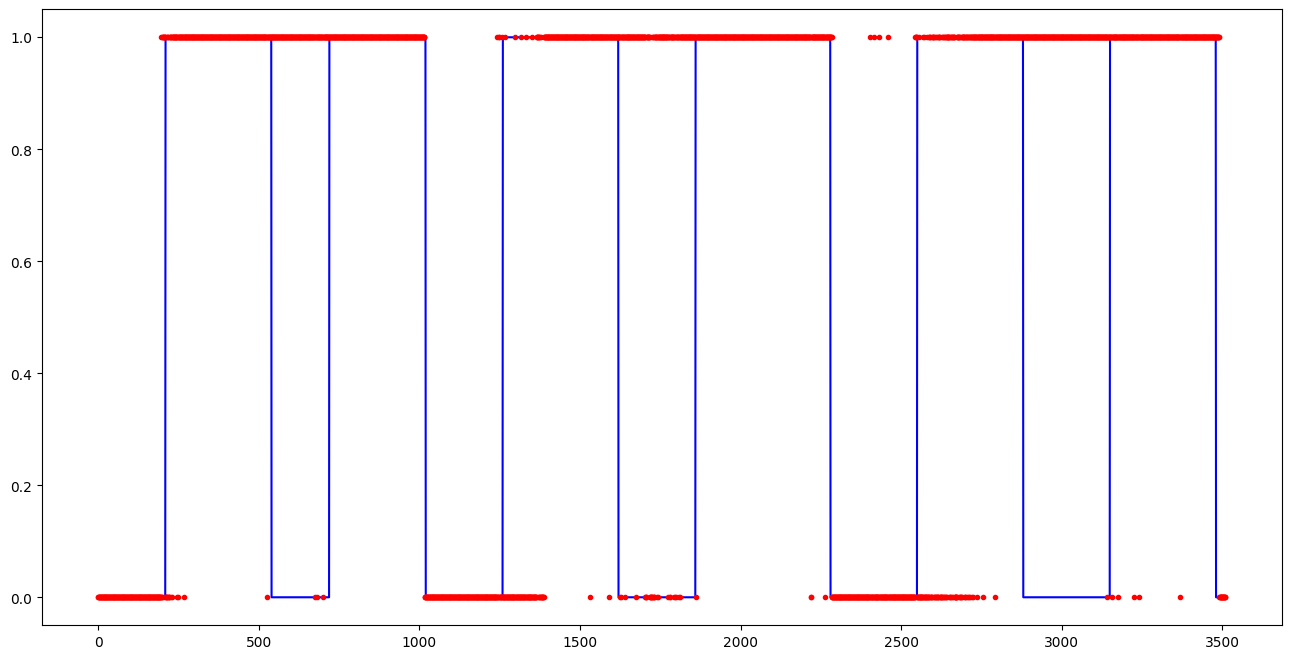

Subject 15
              precision    recall  f1-score   support

           0       0.50      0.75      0.60       973
           1       0.88      0.72      0.79      2537

    accuracy                           0.73      3510
   macro avg       0.69      0.73      0.70      3510
weighted avg       0.78      0.73      0.74      3510



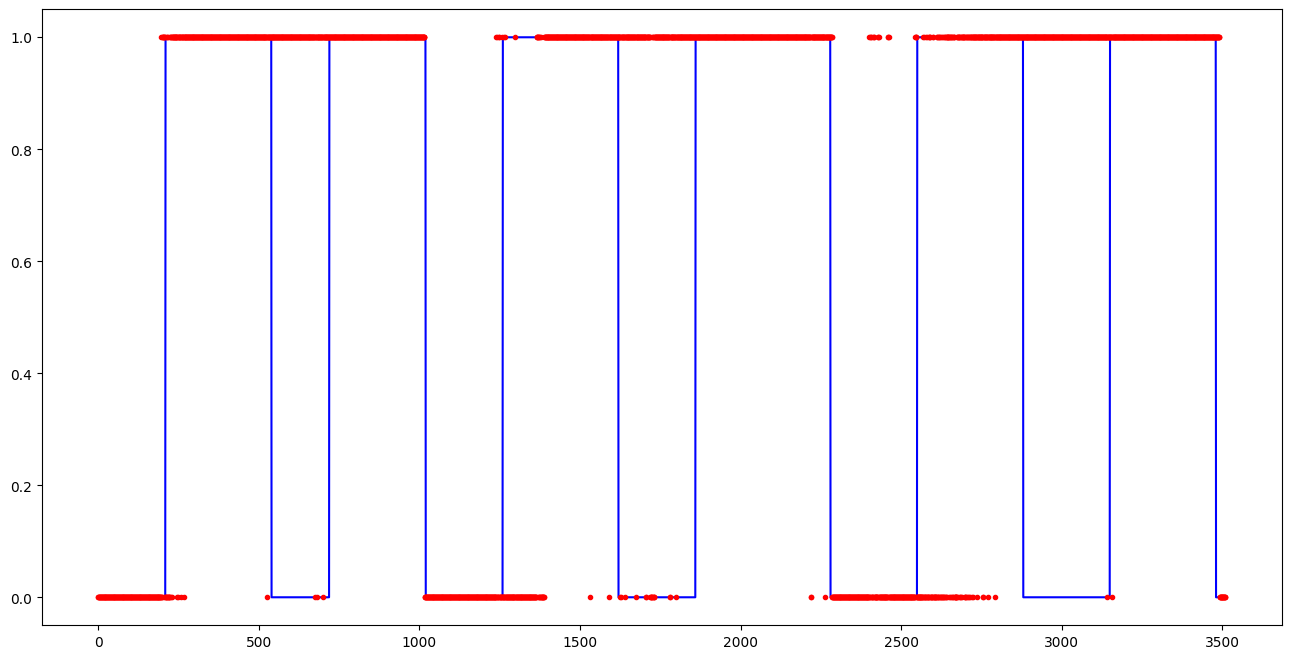

Subject 16
              precision    recall  f1-score   support

           0       0.60      0.72      0.65      1198
           1       0.84      0.75      0.79      2312

    accuracy                           0.74      3510
   macro avg       0.72      0.73      0.72      3510
weighted avg       0.75      0.74      0.74      3510



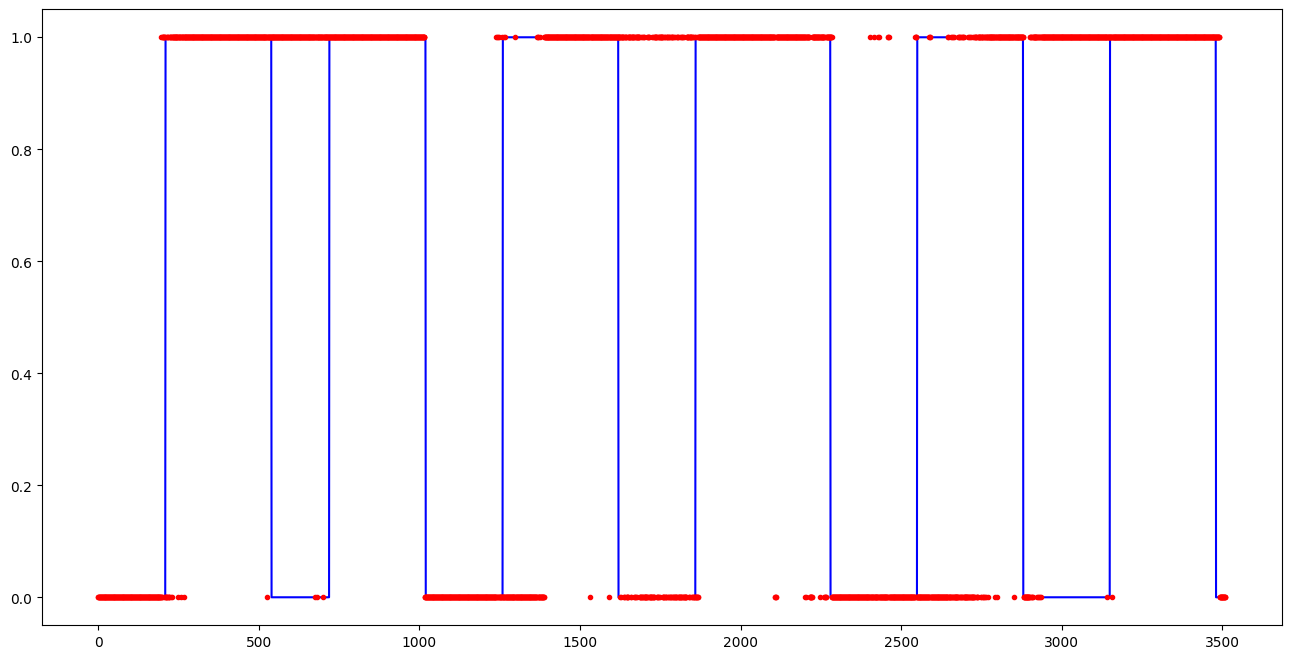

Subject 17
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1354
           1       0.82      0.78      0.80      2156

    accuracy                           0.76      3510
   macro avg       0.75      0.75      0.75      3510
weighted avg       0.76      0.76      0.76      3510



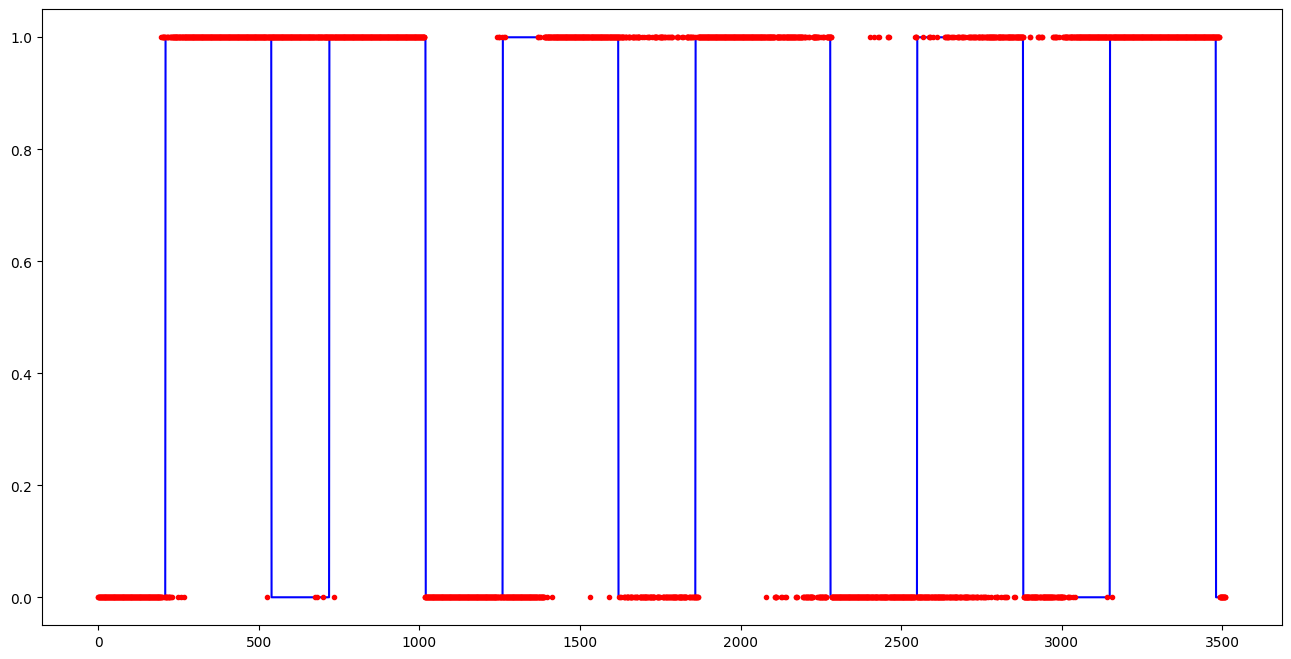

Subject 18
              precision    recall  f1-score   support

           0       0.64      0.79      0.71      1177
           1       0.88      0.78      0.83      2333

    accuracy                           0.78      3510
   macro avg       0.76      0.78      0.77      3510
weighted avg       0.80      0.78      0.79      3510



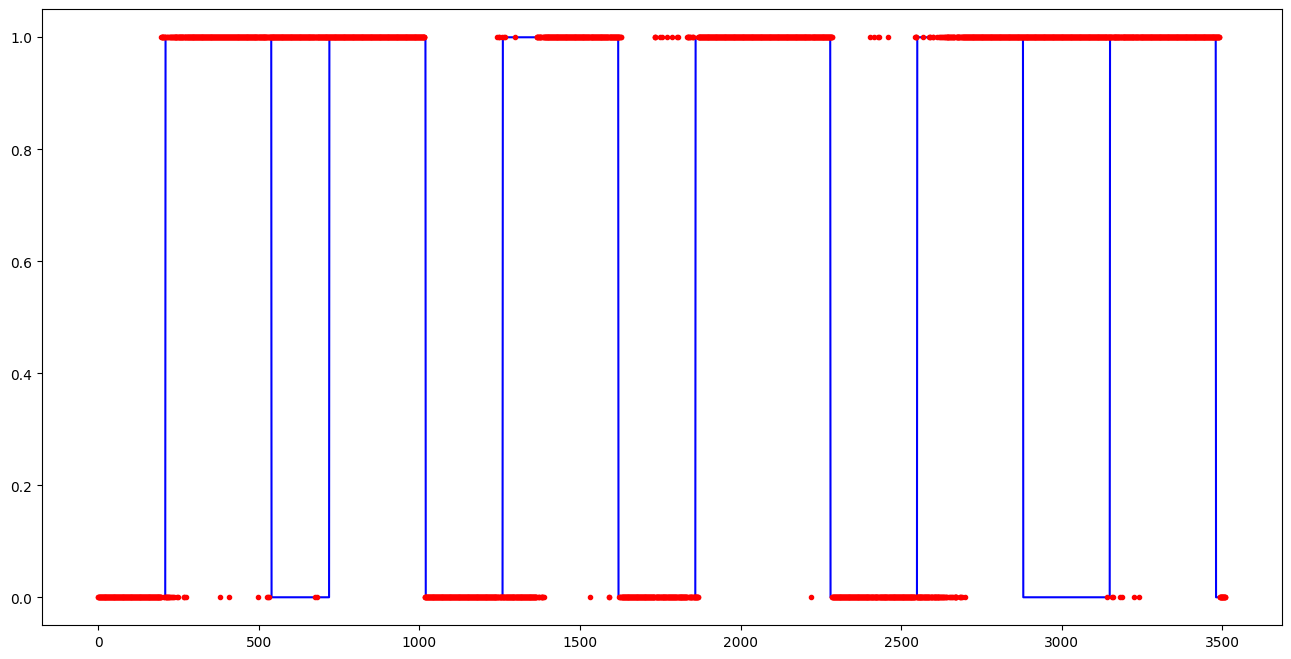

Subject 20
              precision    recall  f1-score   support

           0       0.50      0.71      0.59      1014
           1       0.86      0.71      0.78      2496

    accuracy                           0.71      3510
   macro avg       0.68      0.71      0.68      3510
weighted avg       0.76      0.71      0.72      3510



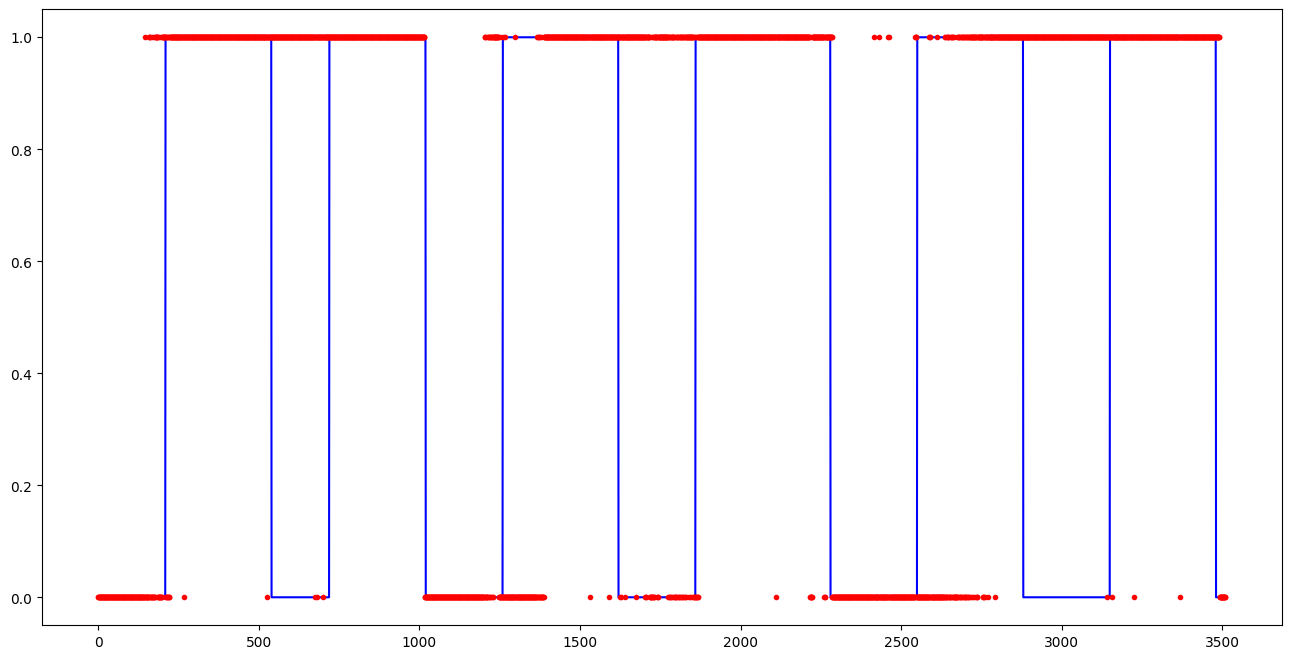

Subject 21
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      1341
           1       0.84      0.80      0.82      2169

    accuracy                           0.78      3510
   macro avg       0.77      0.78      0.77      3510
weighted avg       0.79      0.78      0.78      3510



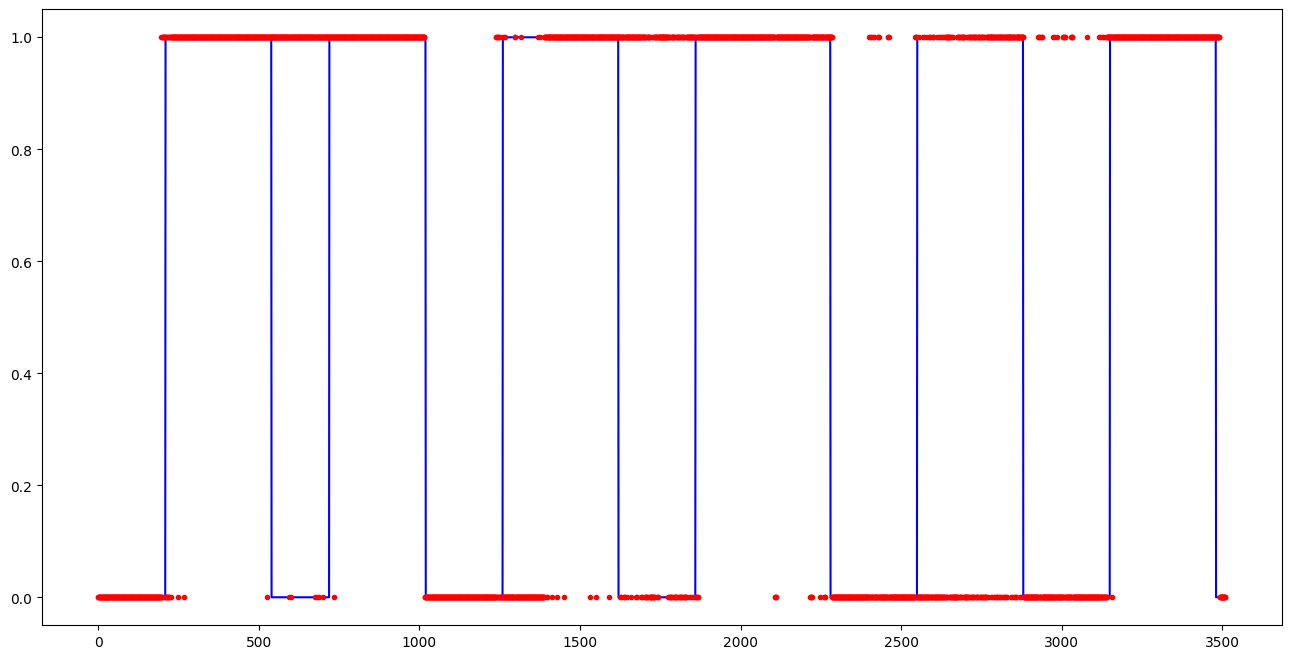

In [42]:
show_results(emp_preds)

Subject 11
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1257
           1       0.93      0.91      0.92      2013

    accuracy                           0.90      3270
   macro avg       0.89      0.90      0.90      3270
weighted avg       0.90      0.90      0.90      3270



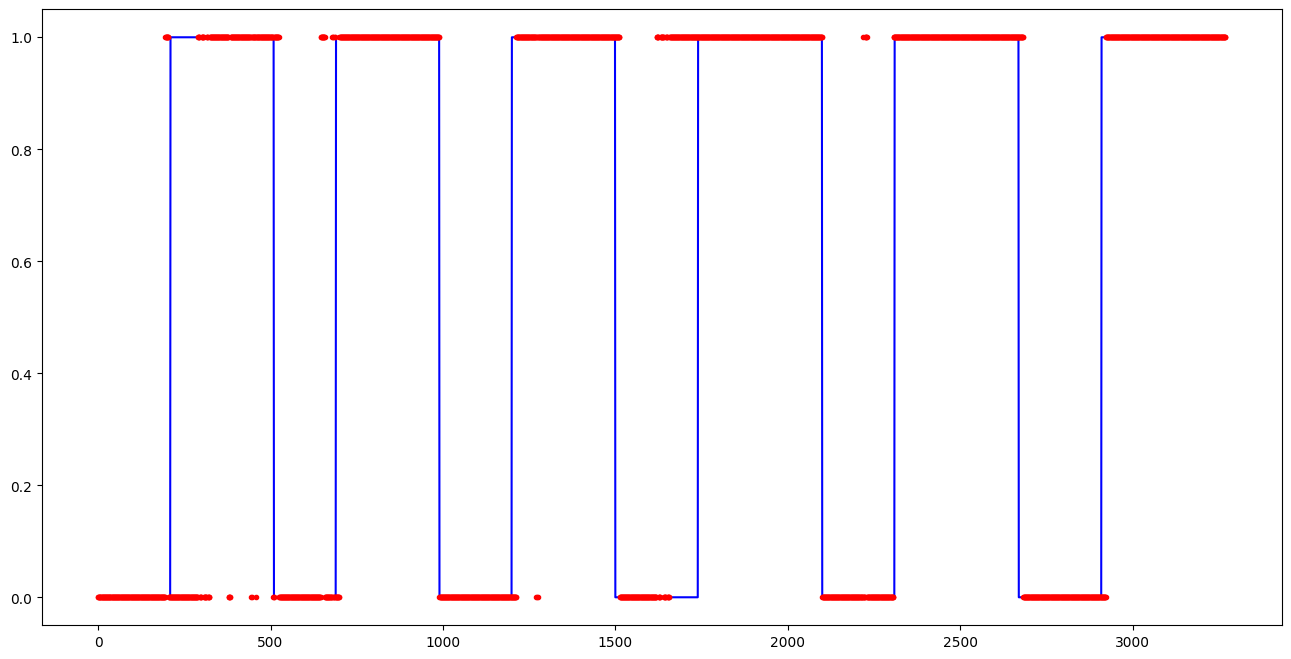

Subject 12
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1215
           1       0.95      0.91      0.93      2055

    accuracy                           0.91      3270
   macro avg       0.90      0.91      0.91      3270
weighted avg       0.92      0.91      0.91      3270



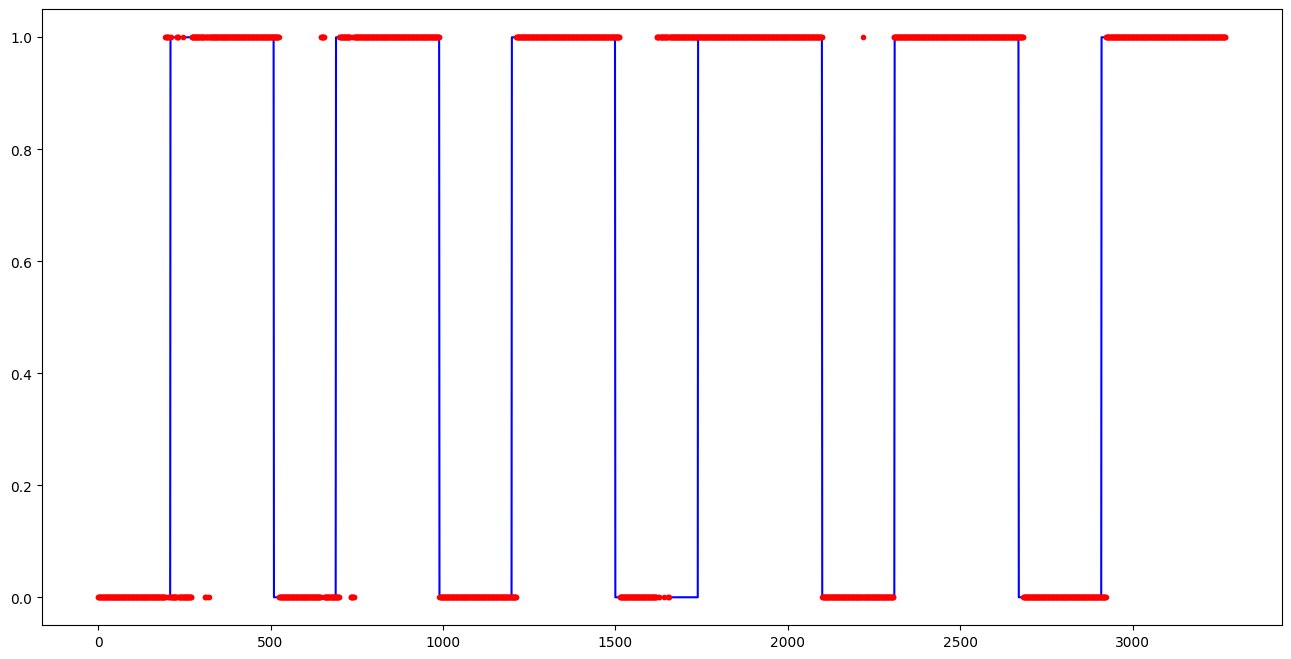

Subject 13
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1320
           1       0.88      0.90      0.89      1950

    accuracy                           0.87      3270
   macro avg       0.86      0.86      0.86      3270
weighted avg       0.87      0.87      0.87      3270



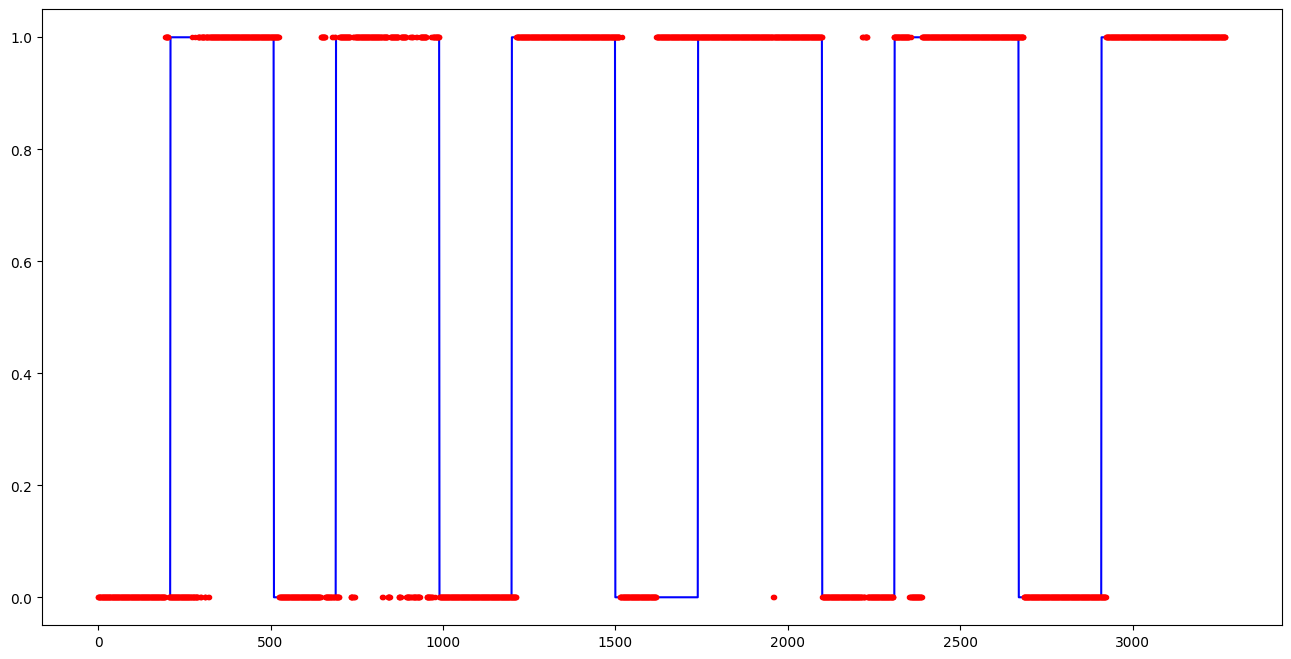

Subject 14
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1279
           1       0.92      0.91      0.91      1991

    accuracy                           0.90      3270
   macro avg       0.89      0.89      0.89      3270
weighted avg       0.90      0.90      0.90      3270



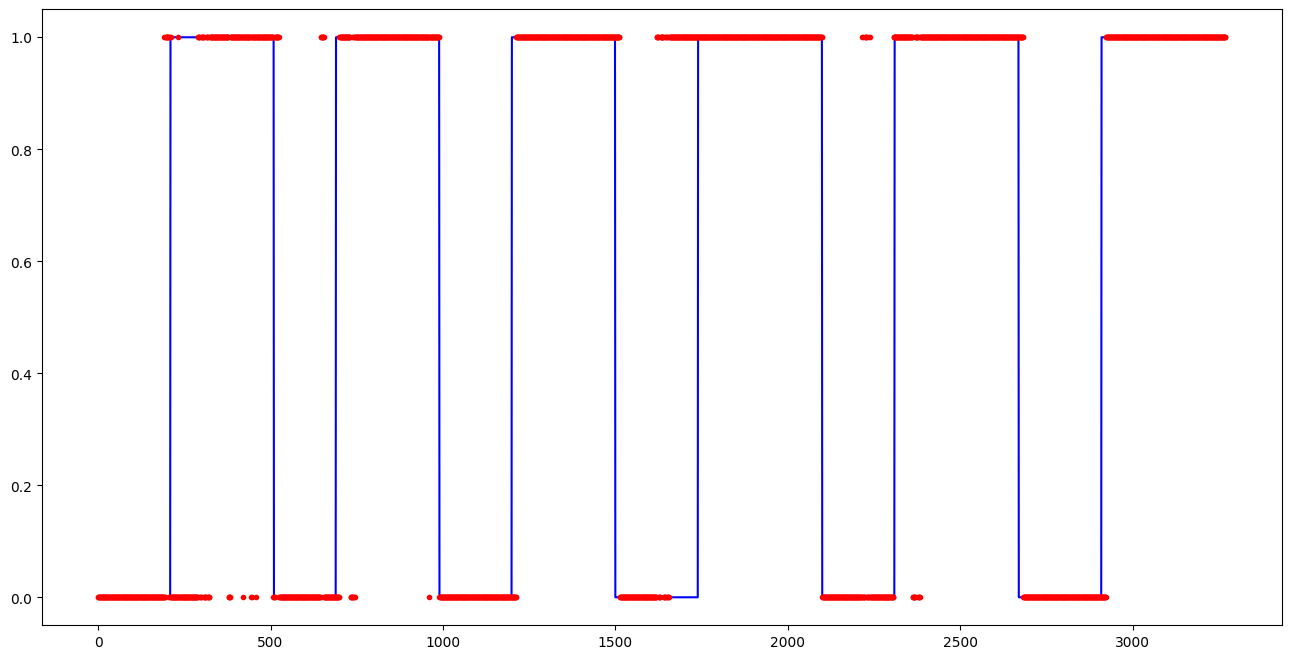

Subject 15
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1233
           1       0.93      0.91      0.92      2037

    accuracy                           0.90      3270
   macro avg       0.89      0.90      0.90      3270
weighted avg       0.90      0.90      0.90      3270



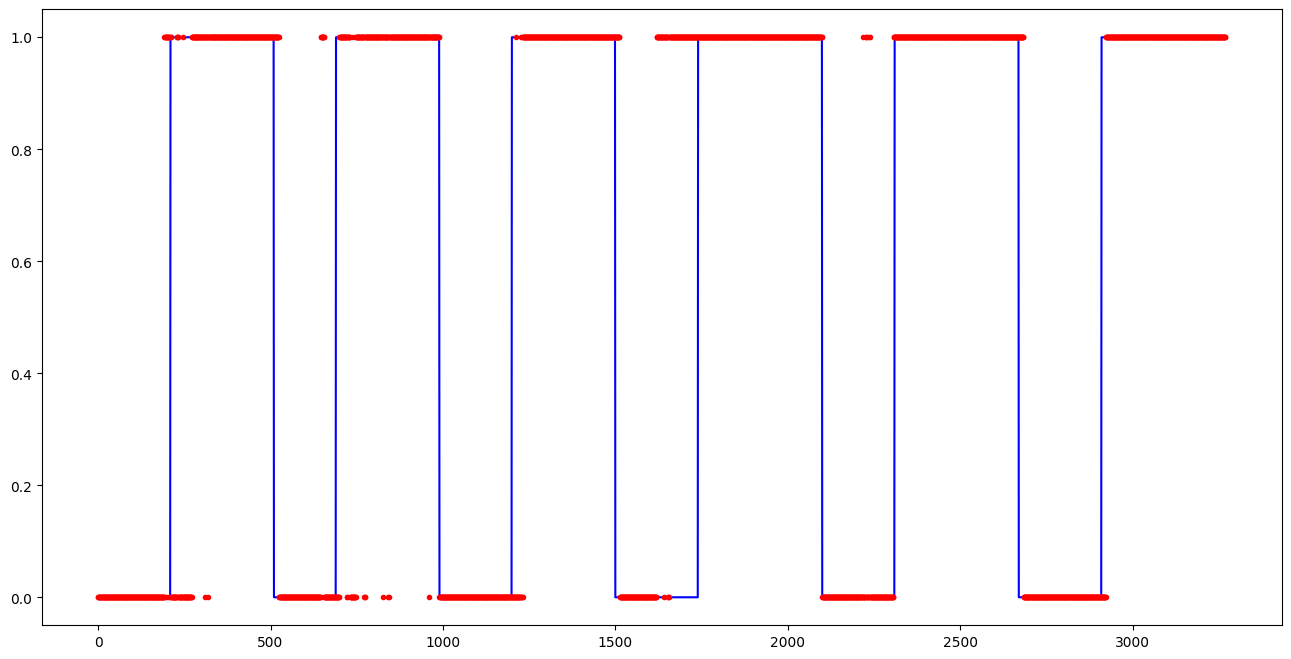

Subject 16
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1138
           1       0.97      0.90      0.93      2132

    accuracy                           0.91      3270
   macro avg       0.90      0.92      0.91      3270
weighted avg       0.92      0.91      0.92      3270



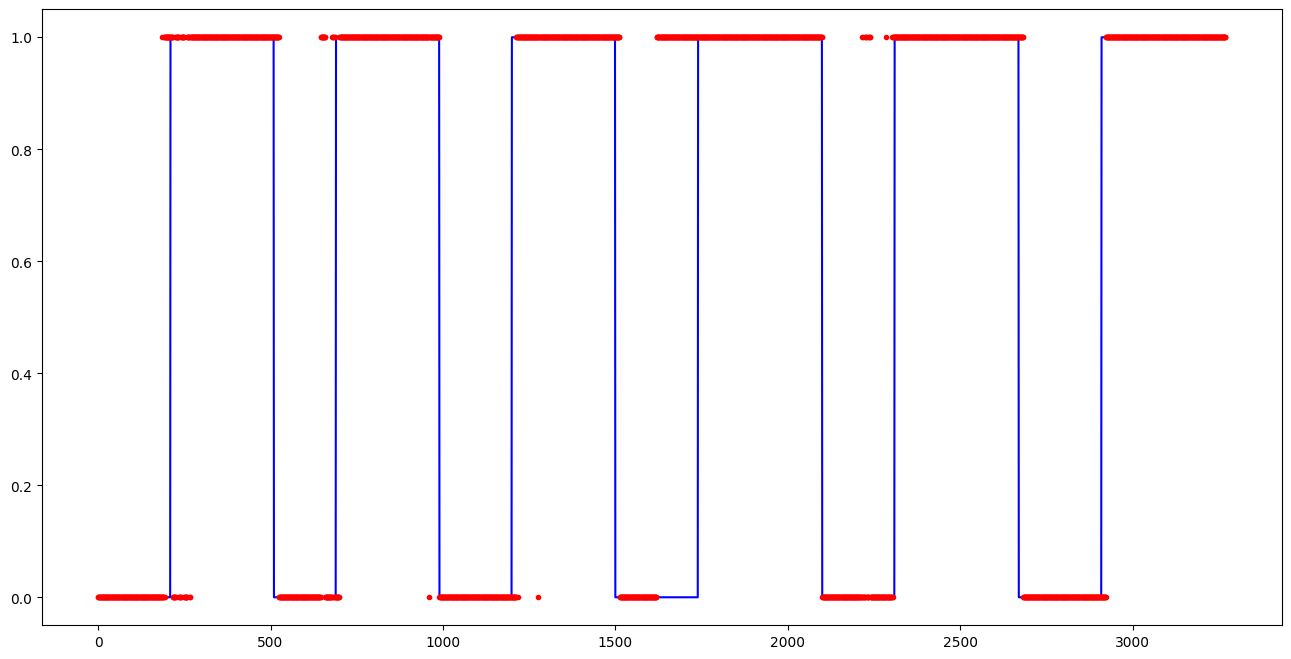

Subject 17
              precision    recall  f1-score   support

           0       0.81      0.89      0.84      1174
           1       0.93      0.88      0.91      2096

    accuracy                           0.88      3270
   macro avg       0.87      0.88      0.87      3270
weighted avg       0.89      0.88      0.88      3270



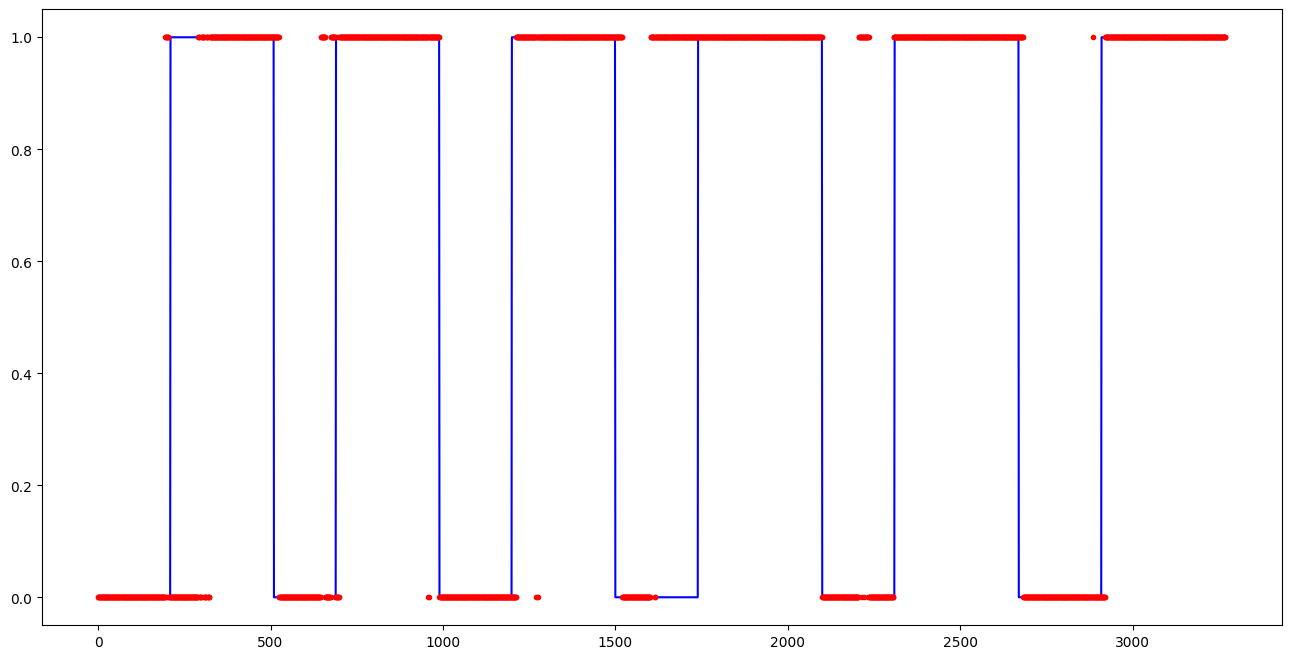

Subject 18
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      1151
           1       0.93      0.87      0.90      2119

    accuracy                           0.87      3270
   macro avg       0.85      0.87      0.86      3270
weighted avg       0.88      0.87      0.87      3270



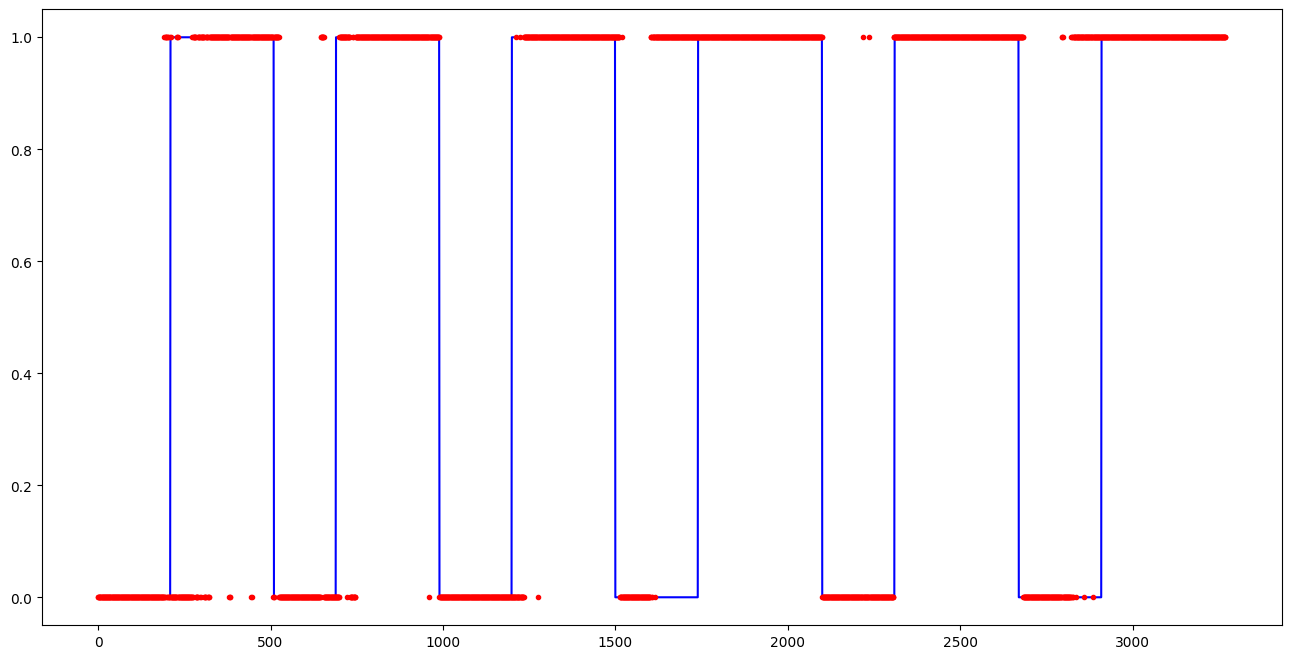

Subject 20
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1231
           1       0.94      0.91      0.93      2039

    accuracy                           0.91      3270
   macro avg       0.90      0.91      0.90      3270
weighted avg       0.91      0.91      0.91      3270



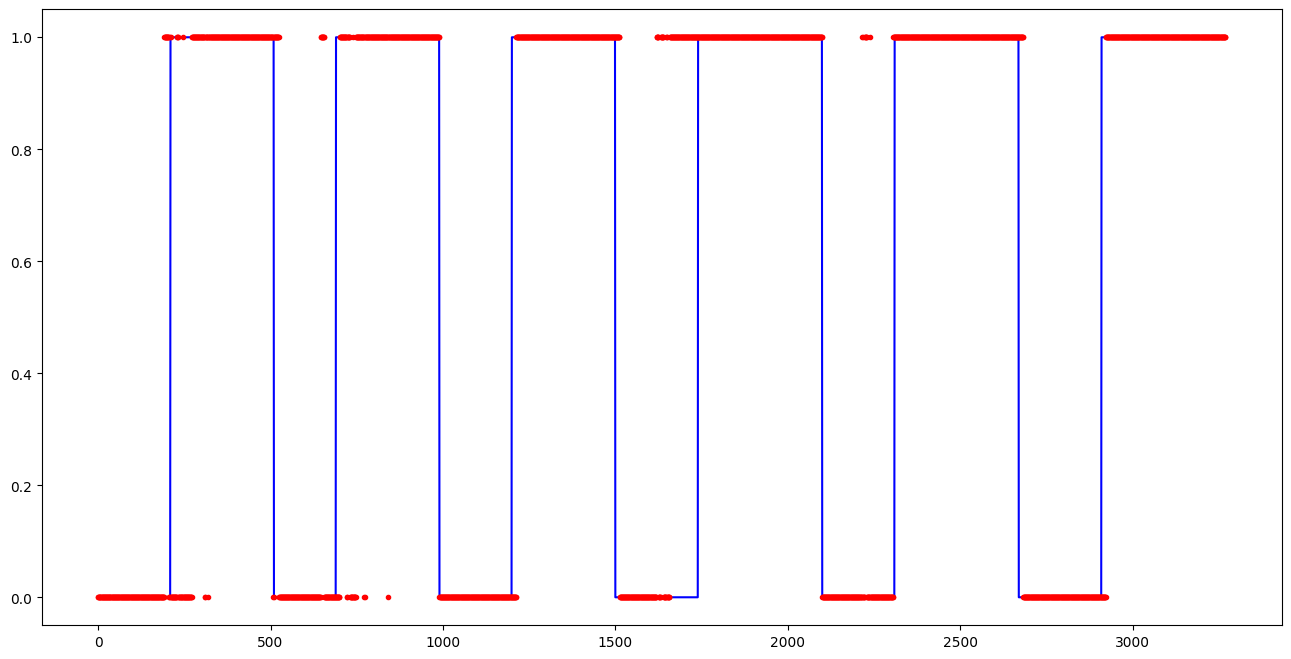

Subject 21
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1212
           1       0.94      0.91      0.92      2058

    accuracy                           0.91      3270
   macro avg       0.90      0.91      0.90      3270
weighted avg       0.91      0.91      0.91      3270



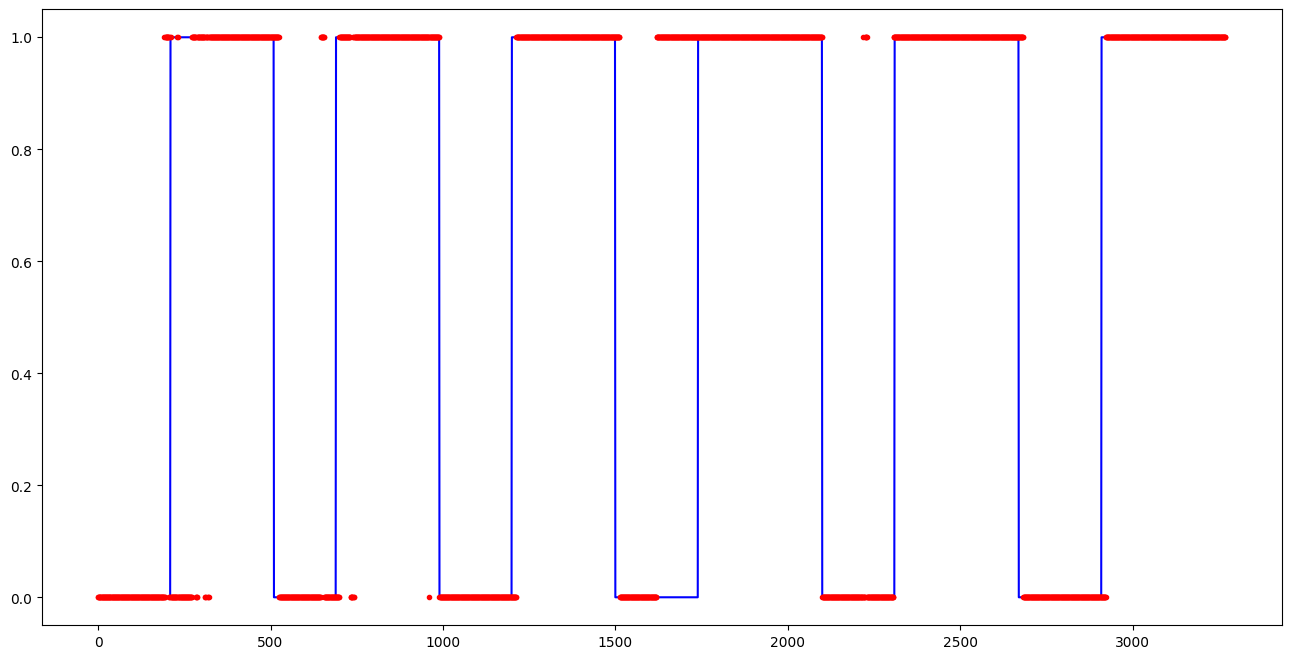

In [39]:
show_results(sms_preds)

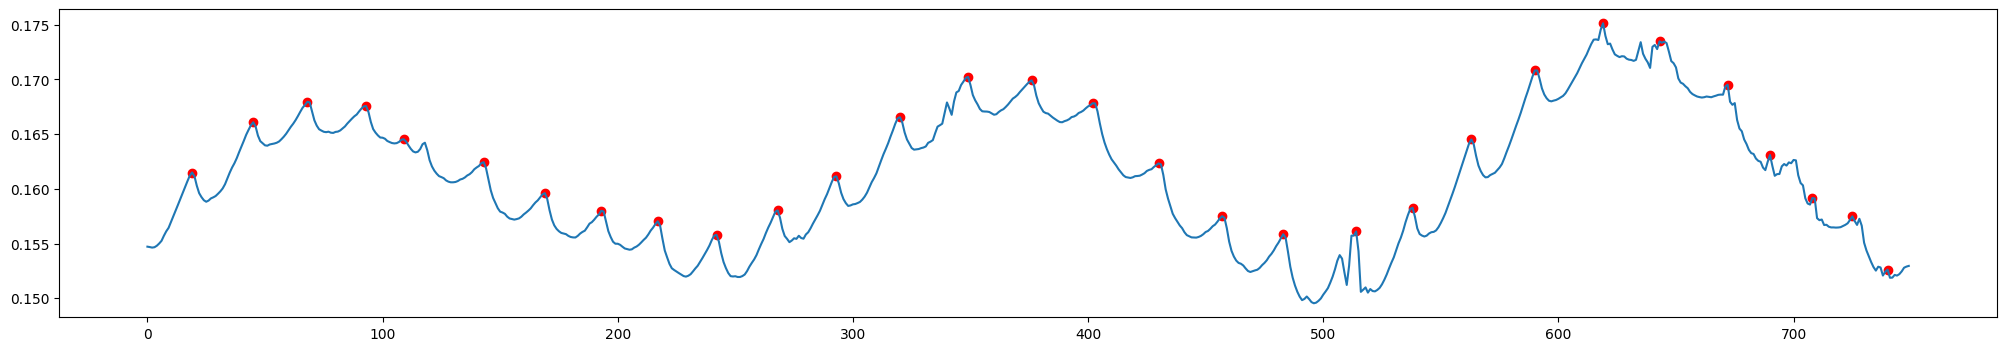

In [4]:
ppg.show_filtered(5, 2, [0.1, 9])

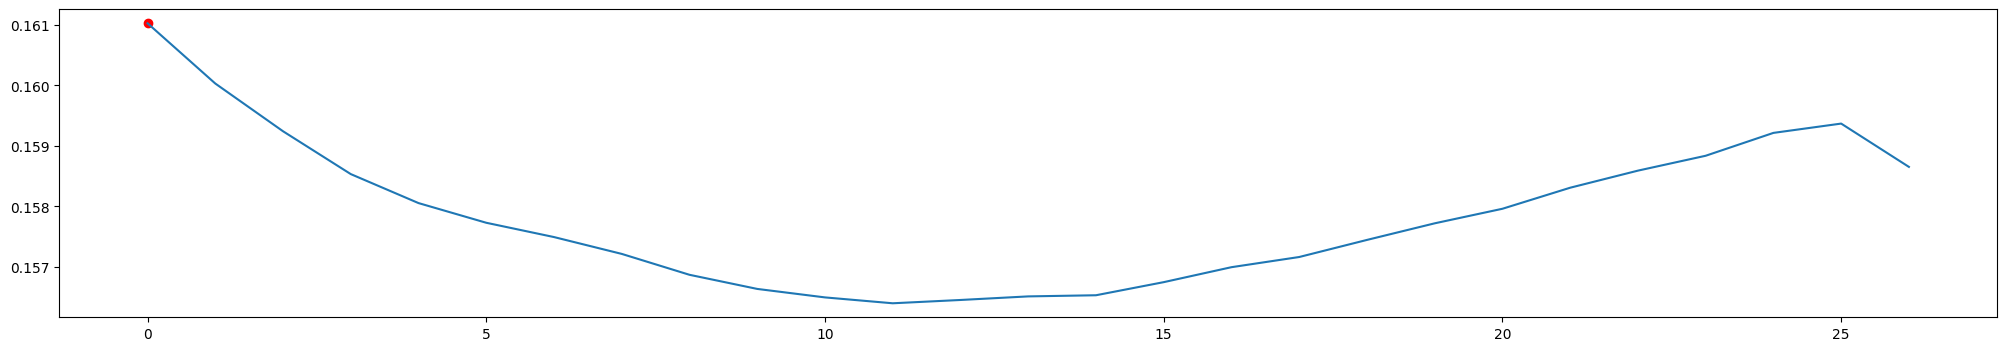

In [6]:
ppg.show_dx1(8)

In [27]:
wi = []
for p in ppg._ms_points:
  if p < 750:
    wi.append(0)

len(wi)

23

In [19]:
np.median([189, 12, 12, 14])

13.0

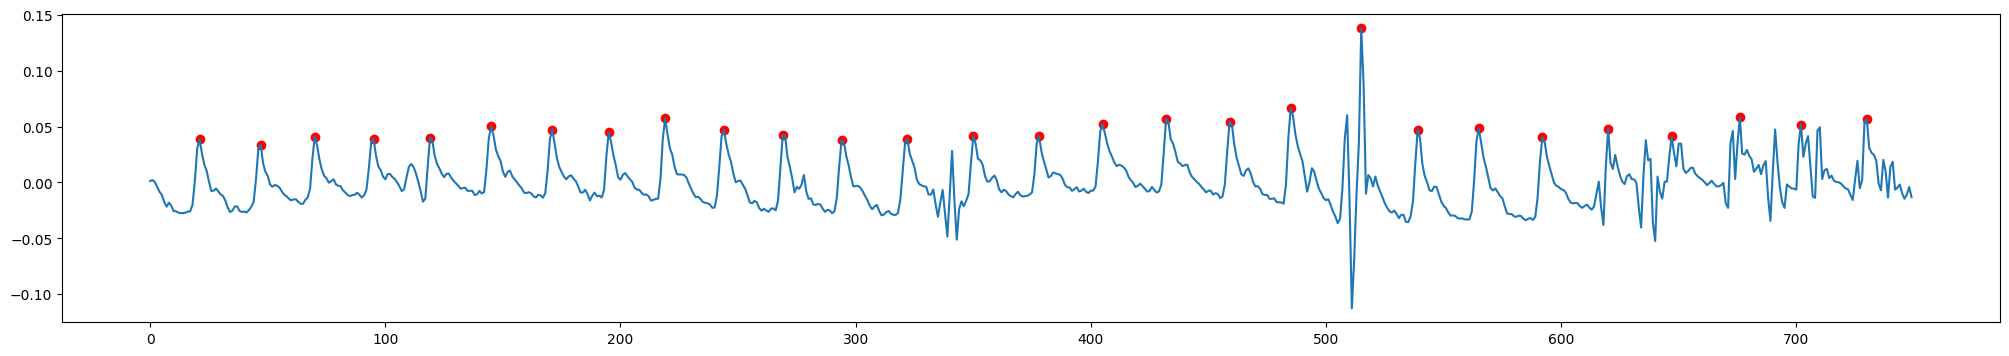

In [3]:
ppg.show_dx(5)

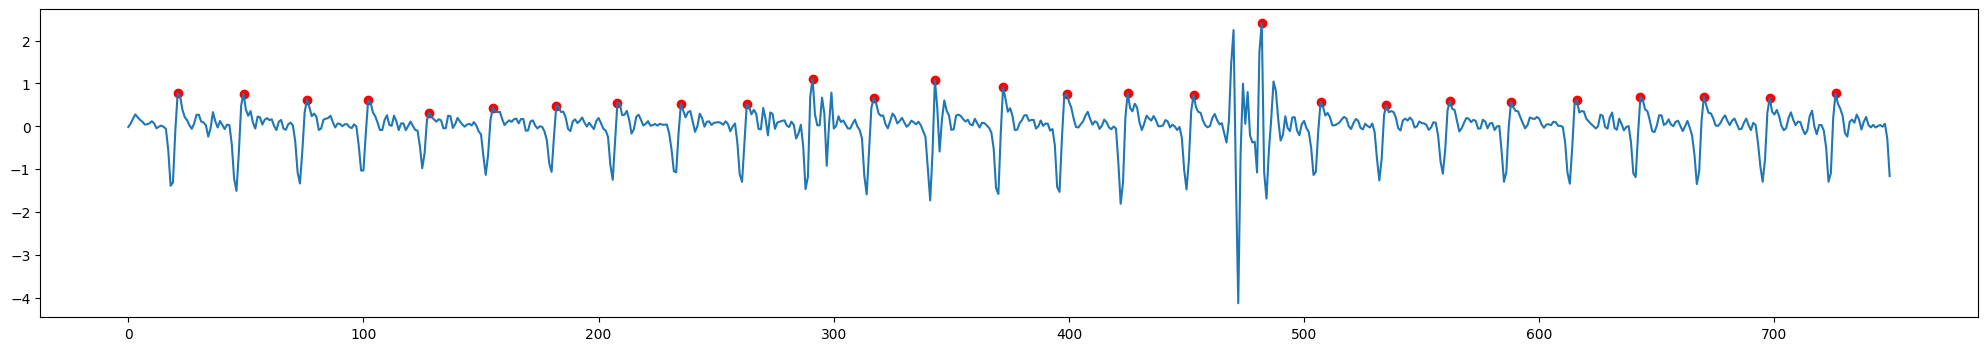

In [13]:
ppg.show_dx(2, 2)

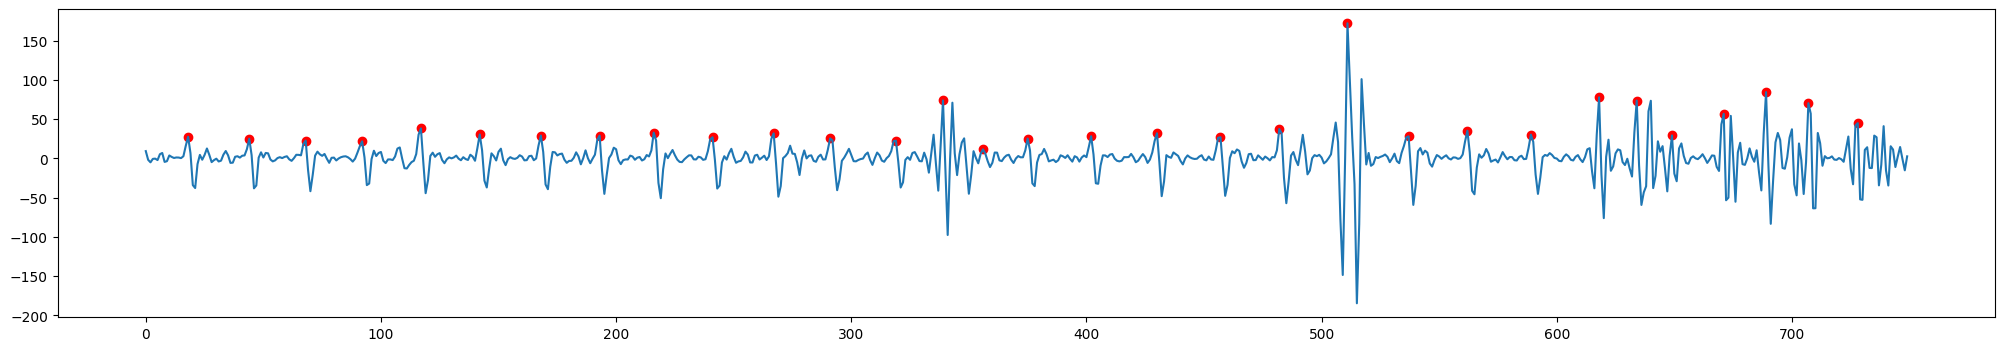

In [6]:
ppg.show_dx(5, 3)

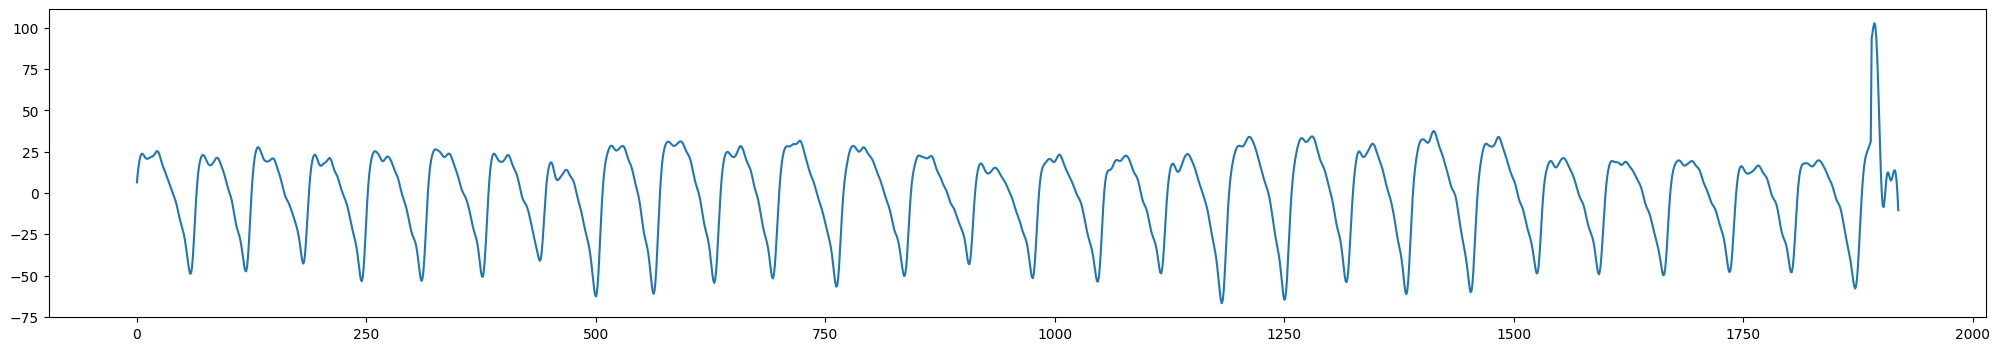

In [21]:
emp.show(5)

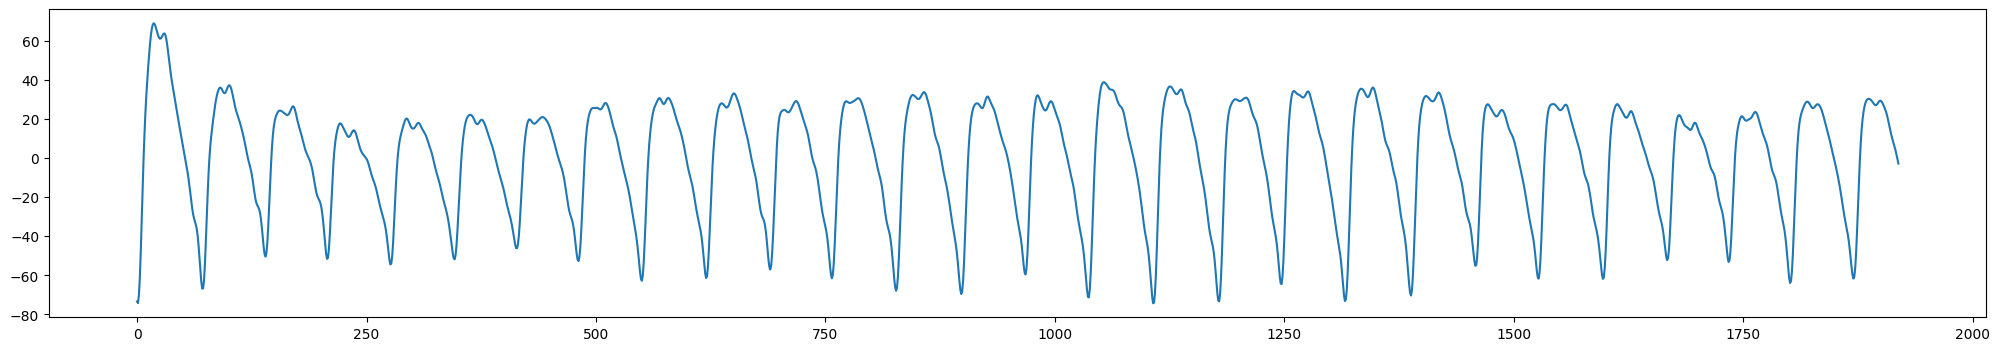

In [6]:
emp.show(0)

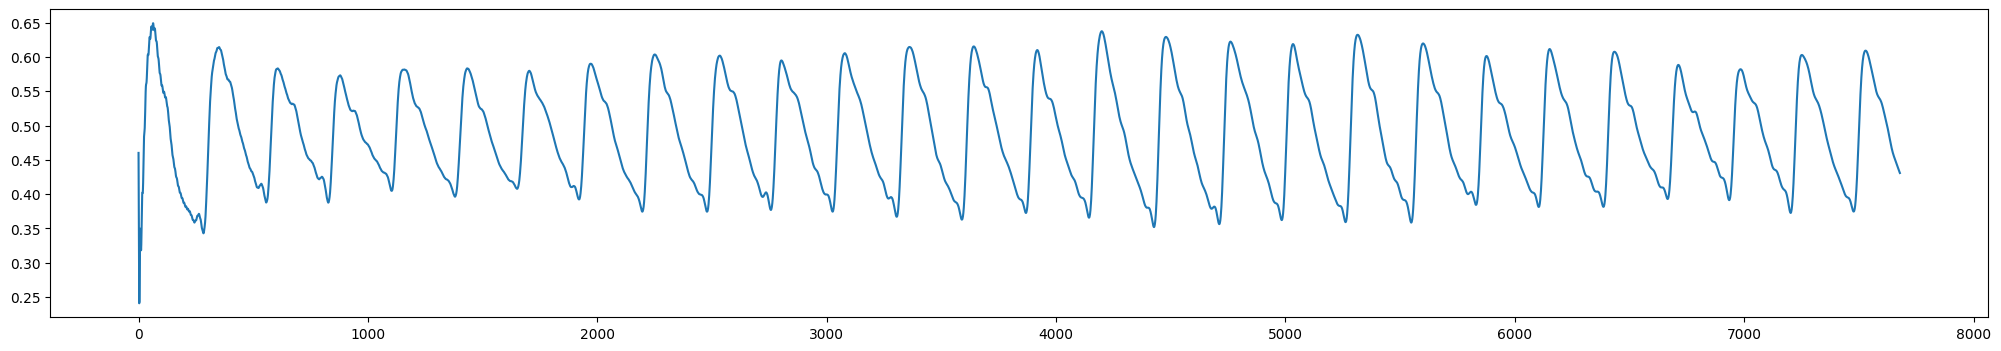

In [5]:
emp.show_filtered(0, 2, [0.1, 10])

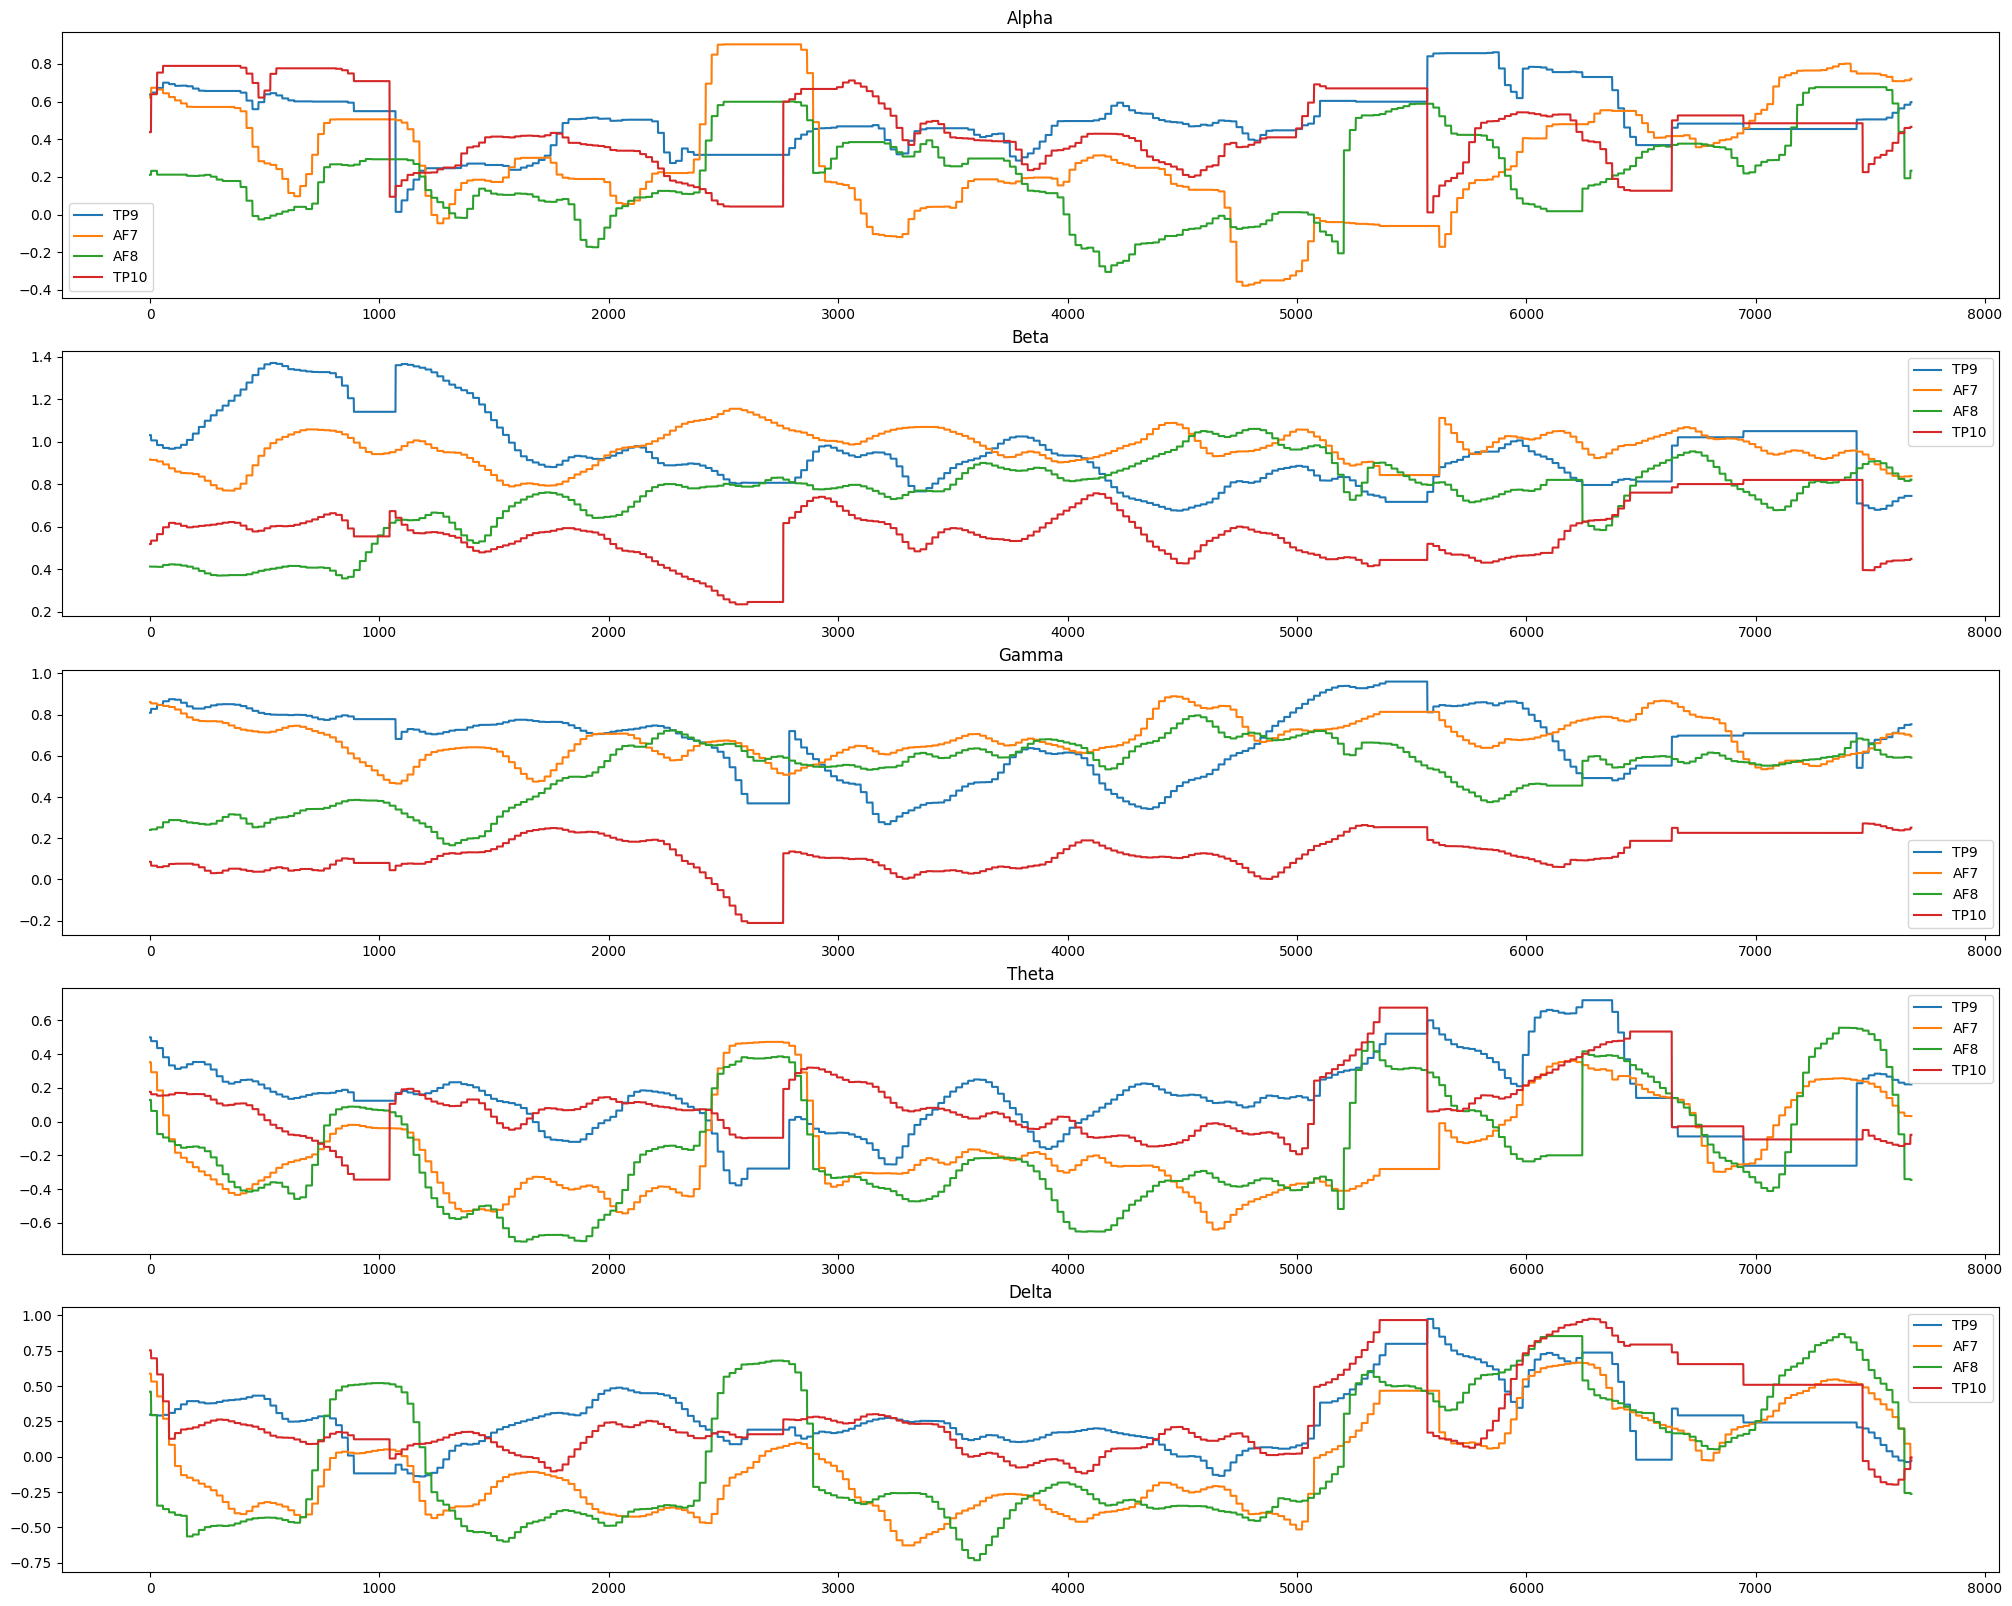

In [4]:
eeg.show(11)

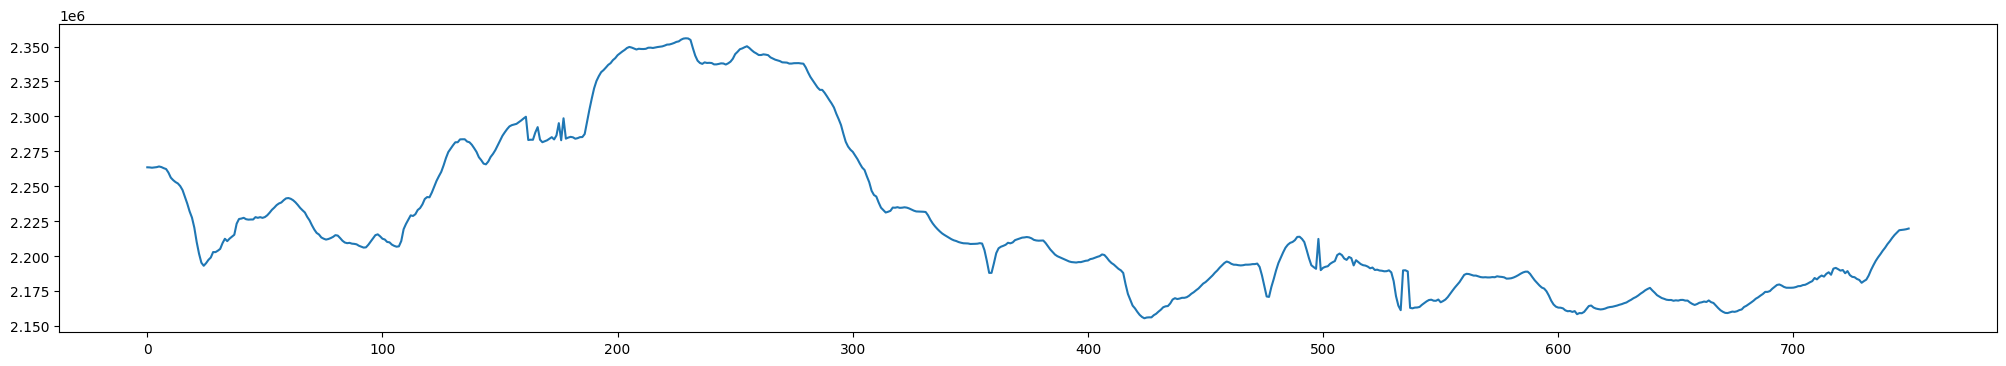

In [18]:
ppg.show(11)

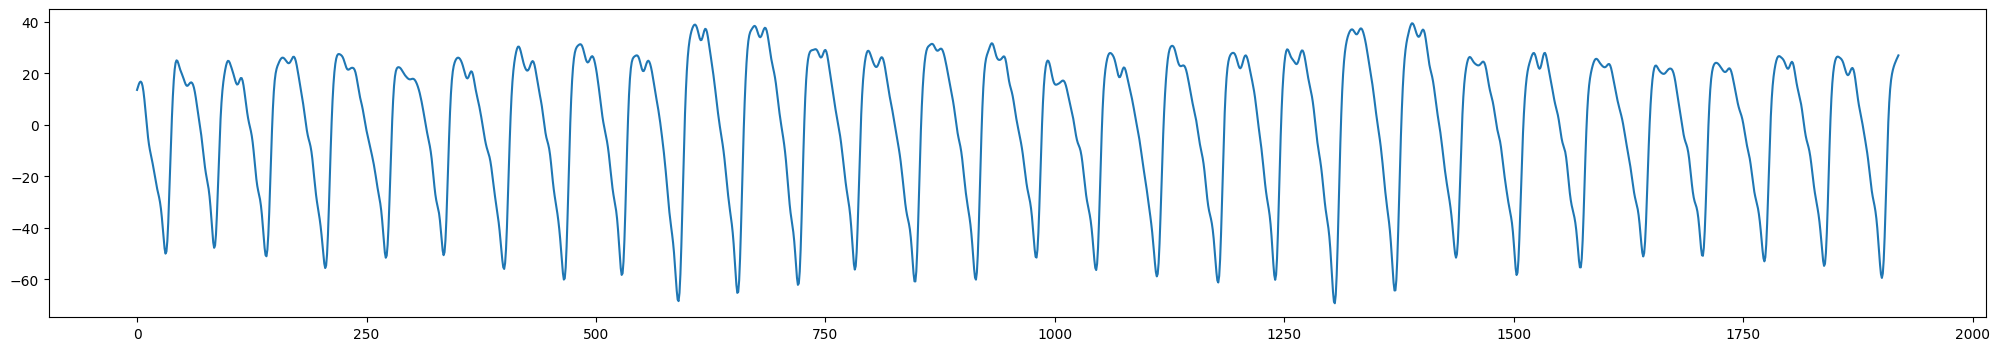

In [17]:
emp.show(11)

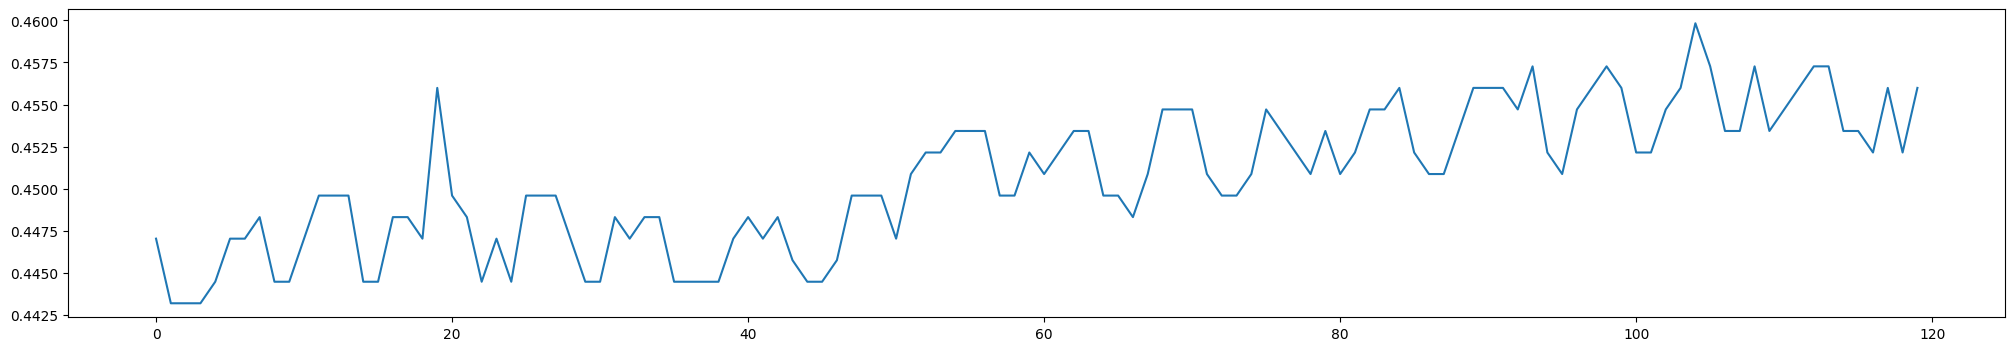

In [19]:
eda.show(11)

In [3]:
def ft(seconds):
  return f"{seconds // 60}\'{seconds % 60}\""

In [5]:
stat = pd.DataFrame(columns=["volunteer", "sms_na", "sms_total", "sms_recording", "emp_na", "emp_total", "emp_recording", "eda_na", "eda_total", "eda_recording", "eeg_na", "eeg_total", "eeg_recording"])
vols = os.listdir(survey_path)
vols.sort()
for v in vols:
  metrics = {"volunteer": v,
             'sms_min': 0, 'sms_max': 0, 'sms_mean': 0, 'sms_std': 0,
             'emp_min': 0, 'emp_max': 0, 'emp_mean': 0, 'emp_std': 0,
             'eda_min': 0, 'eda_max': 0, 'eda_mean': 0, 'eds_std': 0,
             'eeg_min': 0, 'eeg_max': 0, 'eeg_mean': 0, 'eeg_std': 0,
             'sms_ratio': 0,'emp_ratio': 0,'eda_ratio': 0,'eeg_ratio': 0, 'sms_t': '', 'emp_t': '', 'eda_t': '', 'eeg_t': '', "sms_na": 0, "sms_total": 0, "sms_recording": 0, "emp_na": 0, "emp_total": 0, "emp_recording": 0, "eda_na": 0, "eda_total": 0, "eda_recording": 0, "eeg_na": 0, "eeg_total": 0, "eeg_recording": 0}
  samsung = pd.read_csv(os.path.join(survey_path, v, "samsung_ppg.csv"))
  emp = pd.read_csv(os.path.join(survey_path, v, "empatica_ppg.csv"))
  eda = pd.read_csv(os.path.join(survey_path, v, "empatica_eda.csv"))
  eeg = pd.read_csv(os.path.join(survey_path, v, "muse_eeg.csv"))
  # print(f"Volunteer {v}")

  total = samsung.shape[0]
  metrics["sms_total"] = total
  na = samsung.isnull().any(axis=1).sum()
  metrics["sms_na"] = na
  seconds = total // 25
  metrics["sms_recording"] = seconds
  metrics["sms_t"] = ft(seconds)
  cl_s = len(samsung.where(samsung['y'] == 1).dropna())
  bl_s = len(samsung.where(samsung['y'] == 0).dropna())
  metrics['sms_min'] = round(samsung['ppg'].min(), 3).__str__()
  metrics['sms_max'] = round(samsung['ppg'].max(), 2).__str__()
  metrics['sms_mean'] = round(samsung['ppg'].mean(), 3).__str__()
  metrics['sms_std'] = round(samsung['ppg'].std(), 3).__str__()
  s_ratio = round(cl_s / bl_s, 3)
  metrics['sms_ratio'] = s_ratio
  # print(f"  PPG| na: {na} | total: {total} | ratio: {s_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = emp.shape[0]
  metrics["emp_total"] = total
  na = emp.isnull().any(axis=1).sum()
  metrics["emp_na"] = na
  cl = len(emp.where(emp['y'] == 1).dropna())
  bl = len(emp.where(emp['y'] == 0).dropna())
  seconds = total // 64
  metrics["emp_t"] = ft(seconds)
  metrics["emp_recording"] = seconds
  emp_ratio = round(cl / bl, 3)
  metrics['emp_ratio'] = emp_ratio
  metrics['emp_min'] = round(emp['ppg'].min(), 3).__str__()
  metrics['emp_max'] = round(emp['ppg'].max(), 3).__str__()
  metrics['emp_mean'] = round(emp['ppg'].mean(), 3).__str__()
  metrics['emp_std'] = round(emp['ppg'].std(), 3).__str__()
  # print(f"  EMP| na: {na} | total: {total} | ratio: {emp_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eda.shape[0]
  metrics["eda_total"] = total
  na = eda.isnull().any(axis=1).sum()
  cl = len(eda.where(eda['y'] == 1).dropna())
  bl = len(eda.where(eda['y'] == 0).dropna())
  metrics["eda_na"] = na
  seconds = total // 4
  metrics["eda_t"] = ft(seconds)
  metrics["eda_recording"] = seconds
  eda_ratio = round(cl / bl, 3)
  metrics['eda_ratio'] = eda_ratio
  metrics['eda_min'] = round(eda['eda'].min(), 3).__str__()
  metrics['eda_max'] = round(eda['eda'].max(), 3).__str__()
  metrics['eda_mean'] = round(eda['eda'].mean(), 3).__str__()
  metrics['eda_std'] = round(eda['eda'].std(), 3).__str__()
  # print(f"  EDA| na: {na} | total: {total} | ratio: {eda_ratio} | {seconds // 60}\' {seconds % 60}\"")

  total = eeg.shape[0]
  metrics["eeg_total"] = total
  na = eeg.isnull().any(axis=1).sum()
  metrics["eeg_na"] = na
  cl = len(eeg.where(eeg['y'] == 1).dropna())
  bl = len(eeg.where(eeg['y'] == 0).dropna())
  seconds = total // 256
  metrics["eeg_t"] = ft(seconds)
  metrics["eeg_recording"] = seconds
  eeg_ratio = round(cl / (bl | 1), 3)
  metrics['eeg_ratio'] = eeg_ratio
  # print(f"  EEG| na: {na} | total: {total} | ratio: {eeg_ratio} | {seconds // 60}\' {seconds % 60}\"")

  latex = '''\
    \\midrule
    \\textbf {{Voluntário {volunteer}}} \\\\
      Samsung PPG  & {sms_t}    & {sms_ratio}    & {sms_total}  & {sms_na} & {sms_min} & {sms_max} & {sms_mean} & {sms_std}  \\\\
      Empatica PPG  & {emp_t}    & {emp_ratio}    & {emp_total}  & {emp_na} & {emp_min} & {emp_max} & {emp_mean} & {emp_std} \\\\
      Empatica EDA  & {eda_t}    & {eda_ratio}    & {eda_total}  & {eda_na}& {eda_min} & {eda_max} & {eda_mean} & {eda_std}  \\\\
      Muse EEG  & {eeg_t}    & {eeg_ratio}    & {eeg_total}  & {eeg_na} & N/A & N/A & N/A & N/A \\\\
  '''.format(**metrics)
  print(latex)

  # row = pd.DataFrame(data=metrics, index=[0])
  # stat = pd.concat([stat, row], ignore_index=True)


    \midrule
    \textbf {Voluntário 11} \\
      Samsung PPG  & 13'38"    & 1.259    & 20474  & 0 & 1823074.0 & 2414563.0 & 2099593.878 & 127453.333  \\
      Empatica PPG  & 13'35"    & 1.26    & 52174  & 0 & -239.73 & 231.78 & 0.002 & 46.877 \\
      Empatica EDA  & 13'35"    & 1.26    & 3261  & 0& 0.231 & 0.569 & 0.472 & 0.064  \\
      Muse EEG  & 6'29"    & 0.079    & 99658  & 0 & N/A & N/A & N/A & N/A \\
  
    \midrule
    \textbf {Voluntário 12} \\
      Samsung PPG  & 16'11"    & 1.69    & 24278  & 0 & 1315932.0 & 2520418.0 & 1854011.781 & 247407.574  \\
      Empatica PPG  & 17'5"    & 1.695    & 65631  & 0 & -873.33 & 537.78 & 0.115 & 73.405 \\
      Empatica EDA  & 17'4"    & 1.7    & 4099  & 0& 0.256 & 0.847 & 0.514 & 0.149  \\
      Muse EEG  & 15'17"    & 1.553    & 234901  & 0 & N/A & N/A & N/A & N/A \\
  
    \midrule
    \textbf {Voluntário 13} \\
      Samsung PPG  & 14'33"    & 1.886    & 21831  & 0 & 1757389.0 & 2379034.0 & 1980817.224 & 130287.251  \\
      Empat

In [36]:
for row in stat.iterrows():
  print((row[1]["eeg_na"] / row[1]["eeg_total"]) * 100)

0.1691472467407763
0.1454801481098184
0.14152477562609328
0.026455026455026457
0.10570308815637552
0.10613438526326337
0.10101010101010101
0.19566142067205444
0.23630820466984193
0.07198303534950681
0.15717042129339756
0.1392581339410052
0.29953609451657043
